In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df=pd.read_csv('Spotify.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [4]:
df.describe()


,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

[[ 5.95253758e-01  7.44130463e-01  3.54032851e-02 ...  1.23571936e+00
   1.55025566e+00 -9.29866990e-01]
 [-1.66288167e+00  1.15668497e+00  3.07519367e-01 ...  3.06315751e+00
   5.99207323e-01  1.06094401e+00]
 [-9.86153384e-01 -1.46925722e+00 -1.80784690e+00 ...  4.96211319e-01
  -1.23948612e+00  6.20779422e-01]
 ...
 [ 1.27910550e+00 -2.77433085e-01 -1.61539979e+00 ...  6.59756367e-01
   1.17436513e+00 -8.21151862e-01]
 [ 5.24019202e-01 -1.31209360e+00 -1.03495446e+00 ...  2.90002345e-01
  -9.26998812e-01 -6.35175181e-01]
 [ 1.96340245e-01  2.72639594e-01  1.04264665e+00 ... -6.74913437e-01
   5.93431516e-03 -2.98799690e-03]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\AppData\Roaming\Python\Python311\sit

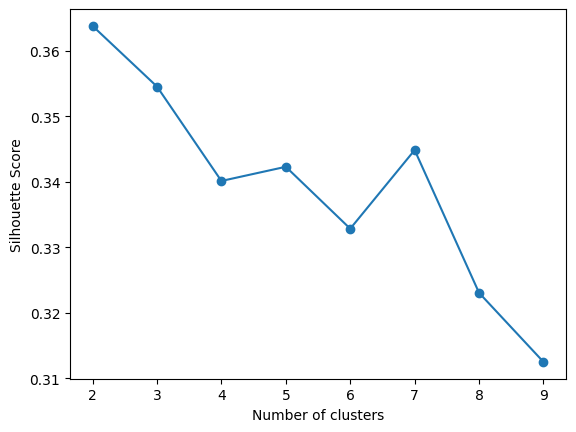

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.36383152961396775
Calinski-Harabasz Score: 1128.8969455209324


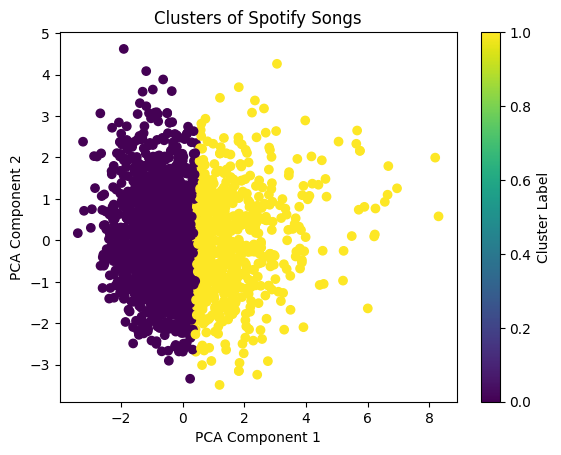

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Spotify.csv')

# Select the features for clustering
features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
               'instrumentalness', 'liveness', 'valence', 'tempo']]
genres = df[['genre']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled)

# Encode the genre column using one-hot encoding
encoder = OneHotEncoder()
genres_encoded = encoder.fit_transform(genres).toarray()
print(genres_encoded)

# Combine the normalized features and the encoded genres
features_combined = pd.concat([pd.DataFrame(features_scaled), pd.DataFrame(genres_encoded)], axis=1)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_combined)

# Function to find the optimal number of clusters
def optimal_kmeans(features_pca, max_k=10):
    silhouette_scores = []
    for n_clusters in range(2, max_k):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(features_pca)
        silhouette_scores.append(silhouette_score(features_pca, labels))
    plt.plot(range(2, max_k), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Find the optimal number of clusters
optimal_kmeans(features_pca)

# Apply KMeans clustering to PCA-transformed features with the optimal number of clusters
optimal_n_clusters = 2  # Adjust this based on the silhouette score plot
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(features_pca)

# Evaluate the model
silhouette = silhouette_score(features_pca, labels)
calinski_harabasz = calinski_harabasz_score(features_pca, labels)

# Print the scores
print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Plotting the clusters
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Clusters of Spotify Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [7]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [8]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(30),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

In [9]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_7520\16668391.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [10]:
px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),x='artist',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

C:\Users\hp\AppData\Local\Temp\ipykernel_7520\195324256.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)